<a href="https://colab.research.google.com/github/Ila021/MCIO1/blob/main/CUERPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETERMINAR EL SEXO DE UNA PERSONA

DESCARGA DE LIBRERÍAS

In [ ]:
from keras import layers
import pandas as pd
import keras

APERTURA DEL ARCHIVO DE DATOS

In [ ]:
df= pd.read_csv('cuerpo.txt', sep=' ')
df

,A_hombros,A_pelvis,A_cade,AP_pecho,AD_pecho,A_codo,A_muneca,A_rodilla,A_tobillo,C_hombros,...,C_biceps,C_brazo,C_rodilla,C_gemelo,C_tobillo,C_muneca,edad,peso,altura,sexo
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
506,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0


DIVIDIMOS EL CONJUTO DE ESTUDIO

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler


X = df.iloc[:, :-1].values  # Todas las columnas excepto la última
y = df.iloc[:, -1].values   # Última columna: 'sexo'

#Conjunto de entrenamiento y prueba
X_train, X_test = X[:400, :], X[400:507, :]
y_train, y_test = y[:400], y[400:507]

# Normalizar características para mejorar el rendimiento del modelo

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


CLASIFICACIÓN BINARIA DEL SEXO (RN densamente conectada)

In [ ]:
modelo = keras.Sequential()

modelo.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
modelo.add(layers.Dense(32, activation='relu'))
modelo.add(layers.Dense(1, activation ='sigmoid'))

#Compilación del modelo
modelo.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

#Entrenamiento
historia= modelo.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7002 - loss: 0.5438 - val_accuracy: 0.8411 - val_loss: 0.4719
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9626 - loss: 0.1611 - val_accuracy: 0.9252 - val_loss: 0.1987
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.0945 - val_accuracy: 0.9346 - val_loss: 0.1463
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0549 - val_accuracy: 0.9346 - val_loss: 0.1283
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0356 - val_accuracy: 0.9626 - val_loss: 0.0972
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0294 - val_accuracy: 0.9439 - val_loss: 0.1099
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.9439 - val_loss: 0.1015
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.9439 - val_loss:

EVALUACIÓN DEL MODELO

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9636 - loss: 0.0722
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


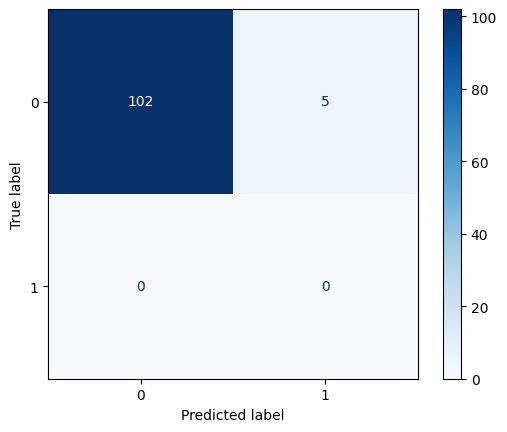

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
loss, accuracy= modelo.evaluate(X_test, y_test)

#Predicción del modelo
y_pre= modelo.predict(X_test)

matrix= confusion_matrix(y_test, y_pre.round())

d=ConfusionMatrixDisplay(matrix)
d.plot(cmap='Blues')

In [ ]:
#Porcentaje de acierto
print(102/107*100)

95.32710280373831


# PREDECIR VALORES PESOS (FLOATS)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np

Y=df.iloc[:, 22].values #Cogemos el peso de las personas a predecir
X=df.drop(columns=[df.columns[22]])

#Convertimos en tensores los vectores a tratar
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X.values, Y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train = torch.FloatTensor(X_train_np)
X_test = torch.FloatTensor(X_test_np)
y_train = torch.FloatTensor(y_train_np).reshape(-1, 1)
y_test = torch.FloatTensor(y_test_np).reshape(-1, 1)

CREACIÓN DEL MODELO (SUPONGO NO LINEALIDAD CON LOS DATOS PERO PODRÍA EXISTIR)

In [ ]:
# Definición del modelo
class RegresionNoLineal(nn.Module):
    def __init__(self):
        super(RegresionNoLineal, self).__init__()
        self.hidden1 = nn.Linear(24, 20)  # 3 entradas -> 16 neuronas ocultas
        self.hidden2 = nn.Linear(20, 8)  # 16 neuronas -> 8 neuronas
        self.output = nn.Linear(8, 1)    # 8 neuronas -> 1 salida
        self.relu = nn.ReLU()  # Activación no lineal

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)  # Sin activación aquí porque es regresión
        return x

modelo = RegresionNoLineal()

In [ ]:
# Función de perdida y optimizador
criterio = nn.MSELoss()
optimizador = optim.Adam(modelo.parameters(), lr=0.0001) #Tratamos de mejorar la convergencia de los datos

In [ ]:
# Entrenamiento del modelo
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass con datos de entrenamiento
    y_pred = modelo(X_train)
    perdida = criterio(y_pred, y_train)

    # Backpropagation
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    if epoch % 100 == 0:
        # Evaluar en conjunto de prueba
        modelo.eval()  # Cambiar a modo evaluación
        with torch.no_grad():
            y_pred_test = modelo(X_test)
            perdida_test = criterio(y_pred_test, y_test)
            print(f'Epoch {epoch}:')
            print(f'  Pérdida training: {perdida.item():.4f}')
            print(f'  Pérdida test: {perdida_test.item():.4f}')
        modelo.train()  # Volver a modo entrenamiento

# Evaluación final
modelo.eval()
with torch.no_grad():
    # Predicciones en conjunto de prueba
    y_pred_test = modelo(X_test)
    perdida_test_final = criterio(y_pred_test, y_test)
    print(f'\nPérdida final en test: {perdida_test_final.item():.4f}')
print(abs(y_pred_test-y_test)/y_test*100)

Epoch 0:
  Pérdida training: 56.3646
  Pérdida test: 52.1488
Epoch 100:
  Pérdida training: 54.8622
  Pérdida test: 50.9278
Epoch 200:
  Pérdida training: 53.3343
  Pérdida test: 49.6917
Epoch 300:
  Pérdida training: 51.7885
  Pérdida test: 48.4438
Epoch 400:
  Pérdida training: 50.2330
  Pérdida test: 47.1964
Epoch 500:
  Pérdida training: 48.6769
  Pérdida test: 45.9537
Epoch 600:
  Pérdida training: 47.1299
  Pérdida test: 44.7259
Epoch 700:
  Pérdida training: 45.6022
  Pérdida test: 43.5232
Epoch 800:
  Pérdida training: 44.1045
  Pérdida test: 42.3527
Epoch 900:
  Pérdida training: 42.6471
  Pérdida test: 41.2253
Epoch 1000:
  Pérdida training: 41.2404
  Pérdida test: 40.1494
Epoch 1100:
  Pérdida training: 39.8941
  Pérdida test: 39.1336
Epoch 1200:
  Pérdida training: 38.6174
  Pérdida test: 38.1851
Epoch 1300:
  Pérdida training: 37.4183
  Pérdida test: 37.3102
Epoch 1400:
  Pérdida training: 36.3031
  Pérdida test: 36.5135
Epoch 1500:
  Pérdida training: 35.2765
  Pérdida te